## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

from sklearn.preprocessing import StandardScaler

## Reading the Data

In [2]:
breast_cancer=pd.read_csv('Breast Cancer Data.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
names = ['id', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [4]:
# setting id number as index

breast_cancer.set_index(['id'],inplace=True)


In [5]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# converting the target variable to binary
breast_cancer['diagnosis']=breast_cancer['diagnosis'].map({'M':1,'B':0})

In [7]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Missing Value checks and Data Cleaning 

In [8]:
breast_cancer.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [9]:
del breast_cancer['Unnamed: 32']

In [10]:
breast_cancer.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


#### Checking the datatype of the columns

In [11]:
breast_cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

## Checking the 5 point summary

In [12]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Checking for duplicate rows

In [13]:
breast_cancer[breast_cancer.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,


## Checking Distribution using histogram

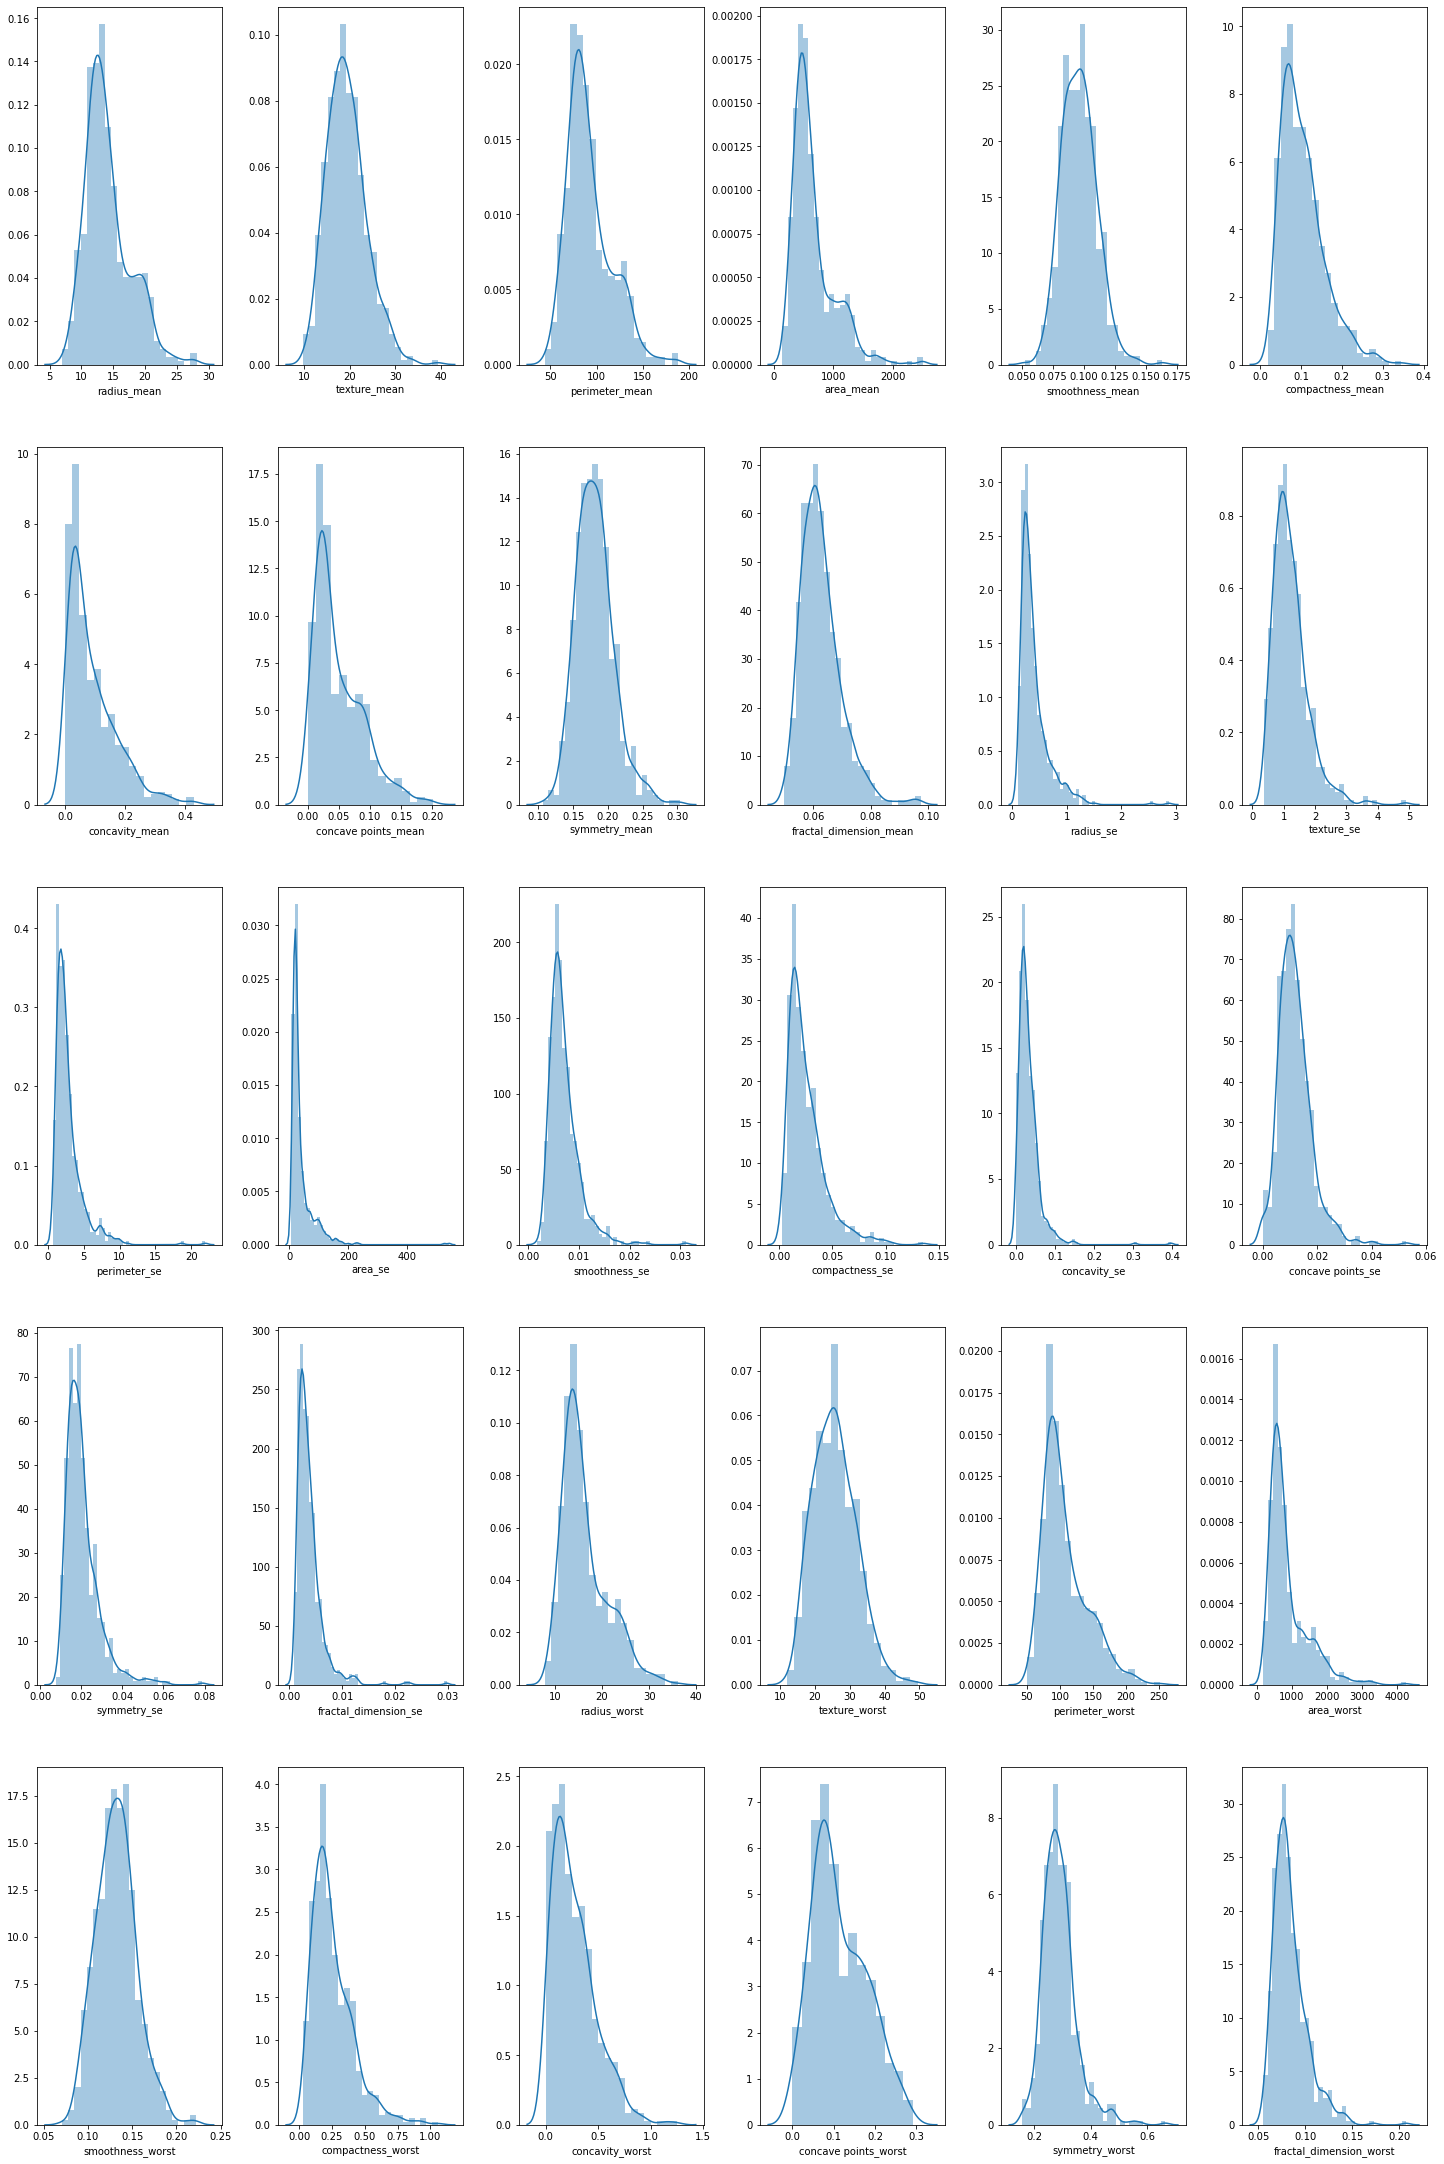

In [14]:
fig,ax=plt.subplots(ncols=6,nrows=5,figsize=(20,30))
index=0
ax=ax.flatten()

for col,value in breast_cancer.items():
    if col != 'diagnosis':
        sns.distplot(value,ax=ax[index])
        index=index+1
        
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Checking Outliers through Boxplot 

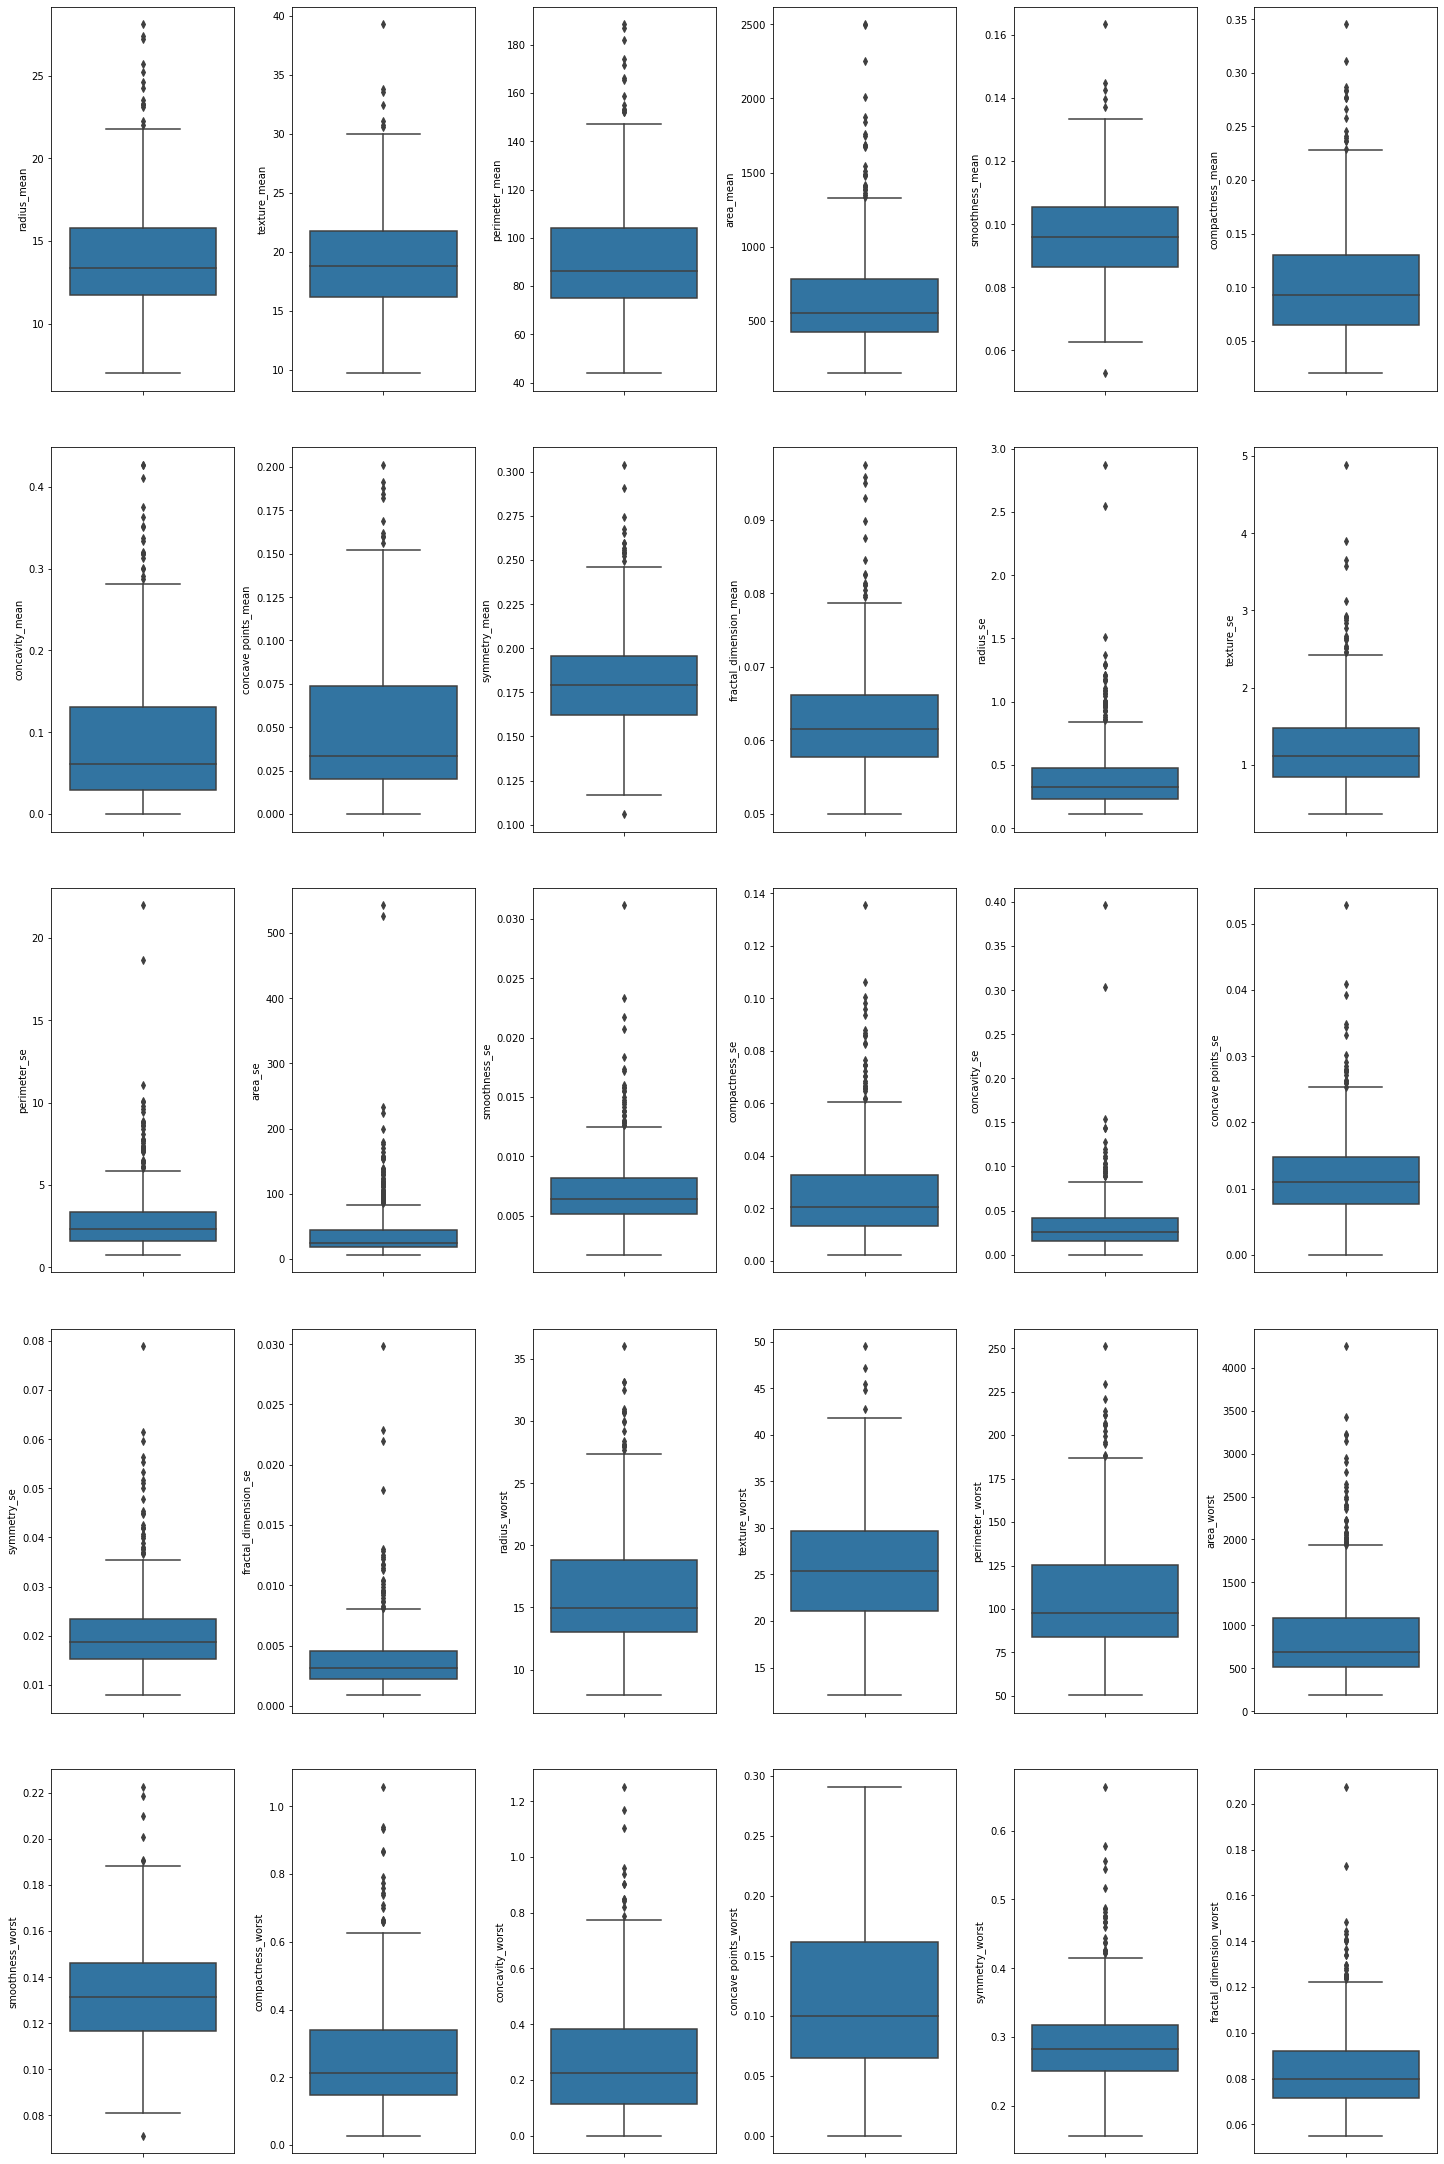

In [15]:
fig,ax=plt.subplots(ncols=6,nrows=5,figsize=(20,30))
index=0
ax=ax.flatten()

for col,value in breast_cancer.items():
    if col != 'diagnosis':
        sns.boxplot(y=col,data=breast_cancer,ax=ax[index])
        index=index+1
        
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Splitting Data to X and Y

In [16]:
X=breast_cancer.drop('diagnosis',axis=1)
Y=breast_cancer['diagnosis']

## Splitting Data into Train and Test Set

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
#cleaning data set to avoid future warning

Y_train=Y_train.values.ravel()
Y_test=Y_test.values.ravel()

## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

# rf.fit(X_train, Y_train)

# rf_trainscore=rf.score(X_train,Y_train)
# rf_testscore=rf.score(Y_train,Y_test)

# print('Training Score: ',rf_trainscore)
# print('Test Score: ',rf_testscore)

In [20]:
# Y_pred=rf.predict(X_test)

## Hyper Parameter Optimization using Grid Search CV

In [59]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
start=time.time()

parameters= {'max_depth': [2,3,4],
           'bootstrap': [True,False],
           'max_features': ['auto','sqrt','log2',None],
           'criterion':['gini','entropy']}

gridsearch = GridSearchCV(rf,cv=10,param_grid=parameters,n_jobs=3)

gridsearch.fit(X_train,Y_train)
print('Bestparameters using Grid Search: ', gridsearch.best_params_)
end=time.time()
print('Time take in Grid Search: {0: .2f} ', format(end - start ))

Bestparameters using Grid Search:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}
Time take in Grid Search: {0: .2f}  71.96980905532837


#### Set best parameters given by grid search

In [21]:
rf.set_params(bootstrap= True, criterion= 'entropy', max_depth= 4, max_features= 'log2')

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42)

## OOB Rate

In [61]:
rf.set_params(warm_start=True, oob_score=True)

min_estimators=15
max_estimators=1000

error_rate={}

for i in range (min_estimators,max_estimators+1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train,Y_train)
    
    oob_error=1-rf.oob_score_
    error_rate[i]= oob_error

In [62]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

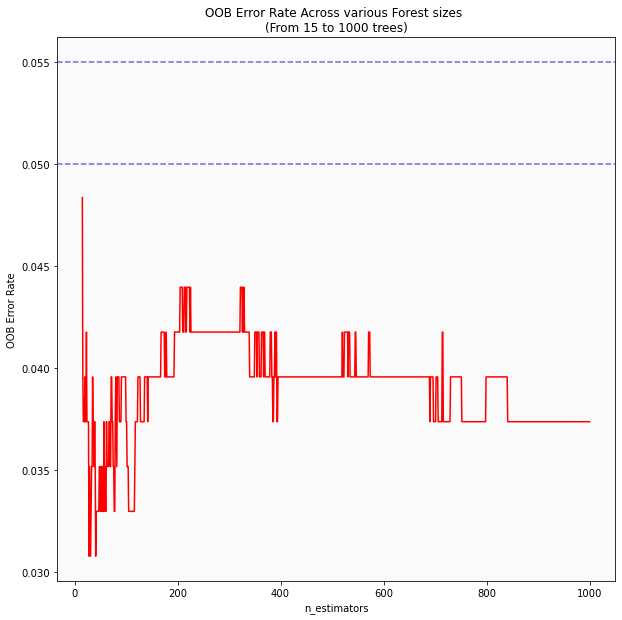

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [65]:
print('OOB Error Rate  for 400 trees is : {0:.5f}'.format(oob_series[400]))

OOB Error Rate  for 400 trees is : 0.03956


In [22]:
# refine tree via OOB output

rf.set_params(n_estimators=400,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=400, random_state=42)

## Training the Random Forest Model

In [23]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=400, random_state=42)

## Variable Importance 

In [24]:
names

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [25]:
names_index = names[2:]
names_index

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [26]:
def variable_importance(fit):
    importances=fit.feature_importances_
    indices=np.argsort(importances)[::-1]
    return {'importance':importances, 'index':indices}

In [27]:
var_imp_rf=variable_importance(rf)
importances_rf=var_imp_rf['importance']
indices_rf=var_imp_rf['index']

In [28]:
def print_var_importance(importances, indices,names_index):
    
    print("Feature Ranking")
    for f in range(0,indices.shape[0]):
        i=f
        print("{0}. The feature '{1}' has mean decrease in impurity of {2:.5}"
              .format(f+1, names_index[indices[i]],importances[indices[f]]))
    

In [29]:
print_var_importance(importances_rf,indices_rf,names_index)

Feature Ranking
1. The feature 'area_worst' has mean decrease in impurity of 0.12603
2. The feature 'perimeter_worst' has mean decrease in impurity of 0.1126
3. The feature 'concave_points_worst' has mean decrease in impurity of 0.11156
4. The feature 'concave_points_mean' has mean decrease in impurity of 0.092333
5. The feature 'radius_worst' has mean decrease in impurity of 0.075607
6. The feature 'concavity_mean' has mean decrease in impurity of 0.058079
7. The feature 'area_mean' has mean decrease in impurity of 0.048655
8. The feature 'concavity_worst' has mean decrease in impurity of 0.048258
9. The feature 'radius_mean' has mean decrease in impurity of 0.046903
10. The feature 'perimeter_mean' has mean decrease in impurity of 0.04466
11. The feature 'area_se' has mean decrease in impurity of 0.04033
12. The feature 'texture_worst' has mean decrease in impurity of 0.024611
13. The feature 'compactness_worst' has mean decrease in impurity of 0.019897
14. The feature 'texture_mean'

## Predictions

In [30]:
Y_pred=rf.predict(X_test)

## Confusion Matrix

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(Y_test,Y_pred)
cf

array([[70,  1],
       [ 3, 40]], dtype=int64)

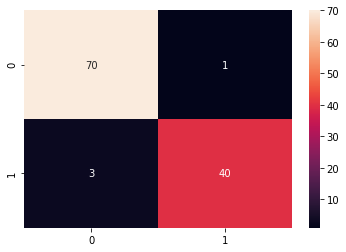

In [41]:
sns.heatmap(cf,annot=True)

## Accuracy

In [46]:
print('The accuracy of the model is: ',metrics.accuracy_score(Y_test,Y_pred))

The accuracy of the model is:  0.9649122807017544


## Error Rate

In [47]:
print('The error rate of the model is: ',1- (metrics.accuracy_score(Y_test,Y_pred)))

The error rate of the model is:  0.03508771929824561


## Area Under Curve (AUC)

In [53]:
Y_pred_proba= rf.predict_proba(X_test)[:,1]

fpr_,tpr_,threshold =roc_curve(Y_test,Y_pred_proba, pos_label=1)

In [55]:
auc_rf=auc(fpr_,tpr_)

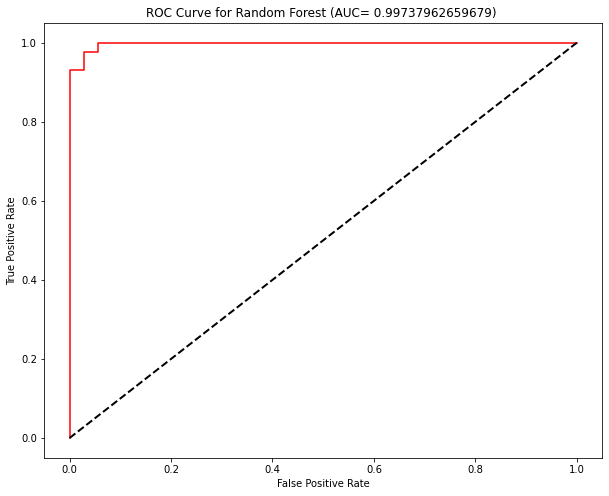

In [84]:
plt.subplots(figsize=(10,8))
plt.plot(fpr_,tpr_,color='red')

#add diagonal line
plt.plot([0,1],[0,1],'k--',lw=2)

plt.title("ROC Curve for Random Forest (AUC= {}) ".format(auc_rf))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

## Classification Report

In [86]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

